In [1]:
import torch
import math
from Project2_tools import *
import matplotlib.pyplot as plt
torch.set_grad_enabled(False)
import Project2_tools

In [2]:
train_input, train_target = generate_set(1000)
test_input, test_target = generate_set(1000)

In [3]:
print(train_input)

tensor([[0.1081, 0.0218],
        [0.4006, 0.9954],
        [0.0788, 0.8184],
        ...,
        [0.2459, 0.9911],
        [0.5045, 0.6725],
        [0.1773, 0.6899]])


In [4]:
print(train_target)

tensor([-1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
         1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,
        -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        -1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
        -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
         1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
         1,  1, -1,  1,  1,  1, -1, -1, 

In [5]:
#better results with normalosation
mean = train_input.mean()
std = train_input.std()
train_input = train_input-mean
train_input = train_input/std
test_input = test_input-mean
test_input = test_input/std


In [6]:
lr_reduction = 0
mseLoss = Project2_tools.MSE()
weight_bias = 0.5
epoch = 50
batch_size = 1
rounds = 5



In [7]:
def compute_error(input,target):
    nb_errors = 0
    for b in range(0, input.size(0)):
        output = model.forward(input[b])
        if ((output < 0 and target[b] == 1) or (output >= 0 and target[b] == -1)):
            nb_errors += 1 
    return nb_errors

In [8]:

lr = 0.005 # learning rate
train_results = []
test_results = []
for i in range(rounds):   
    print("round:",i)
    model = Project2_tools.Sequential(Project2_tools.Linear(2,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,1,weight_bias), Project2_tools.Tanh())

    for j in range(epoch):
        if lr_reduction and j%10 == 0:
            lr = lr*0.85
        loss = []
        for b in range(int(train_input.size(0)/batch_size)):
            for i in range(0, batch_size):
                output = model.forward(train_input[i+b*batch_size]) 
                loss.append(mseLoss.forward(output, train_target[i+b*batch_size])) 
                mseLoss_var = mseLoss.backward() 
                model.backward(mseLoss_var) 

            model.Stock_Grad_Descent(lr) 
            model.zero_grad() 
        loss_mean = torch.mean(torch.tensor(loss)) 


    nb_errors_train = compute_error(train_input,train_target)
    nb_errors_test = compute_error(test_input,test_target)
    
    
    print("Train Error : ",nb_errors_train/train_input.size(0)*100,"%")
    print("Test Error : ",nb_errors_test/test_input.size(0)*100,"%")
    print("")
    train_results.append(nb_errors_train/train_input.size(0)*100)
    test_results.append(nb_errors_test/test_input.size(0)*100)
    



round: 0


C:\Users\JAN\Desktop\master 2\deep learning\deeplearning_project\Deep_learning_project\project2\Project2_tools.py:91: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2985.)
  return self.W_x.mv(input.T)+self.b


Train Error :  2.8000000000000003 %
Test Error :  3.2 %

round: 1
Train Error :  2.4 %
Test Error :  3.0 %

round: 2
Train Error :  2.7 %
Test Error :  3.0 %

round: 3
Train Error :  2.4 %
Test Error :  3.3000000000000003 %

round: 4
Train Error :  2.6 %
Test Error :  2.7 %



In [9]:
train_mean =  sum(train_results)/len(train_results)
test_mean = sum(test_results)/len(test_results)

print("train mean:",train_mean)
print("test mean :",test_mean)

train mean: 2.58
test mean : 3.04


In [10]:
train_results.sort()
test_results.sort()

print("train smalest:",train_results[0])
print("test smalest :",test_results[0])

train smalest: 2.4
test smalest : 2.7


In [12]:
lr = 0.005 # learning rate

list_epoch = []
for e in range(50):
    train_results = []
    test_results = []
    print("epoch:",e)
    for i in range(10):   
        
        model = Project2_tools.Sequential(Project2_tools.Linear(2,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,1,weight_bias), Project2_tools.Tanh())

        for j in range(e):
            if lr_reduction and j%10 == 0:
                lr = lr*0.85
            loss = []
            for b in range(int(train_input.size(0)/batch_size)):
                for i in range(0, batch_size):
                    output = model.forward(train_input[i+b*batch_size]) 
                    loss.append(mseLoss.forward(output, train_target[i+b*batch_size])) 
                    mseLoss_var = mseLoss.backward() 
                    model.backward(mseLoss_var) 

                model.Stock_Grad_Descent(lr) 
                model.zero_grad() 
            loss_mean = torch.mean(torch.tensor(loss)) 


        nb_errors_train = compute_error(train_input,train_target)
        nb_errors_test = compute_error(test_input,test_target)


        #print("Train Error : ",nb_errors_train/train_input.size(0)*100,"%")
        #print("Test Error : ",nb_errors_test/test_input.size(0)*100,"%")
        #print("")
        train_results.append(nb_errors_train/train_input.size(0)*100)
        test_results.append(nb_errors_test/test_input.size(0)*100)
    train_mean =  sum(train_results)/len(train_results)
    test_mean = sum(test_results)/len(test_results)
    print("Train Error : ",train_mean,"%")
    print("Test Error : ",test_mean,"%")
    print("")
    list_epoch.append(train_mean)
        
    

epoch: 0
Train Error :  50.540000000000006 %
Test Error :  50.900000000000006 %

epoch: 1
Train Error :  7.42 %
Test Error :  7.639999999999999 %

epoch: 2
Train Error :  6.49 %
Test Error :  6.05 %

epoch: 3
Train Error :  6.82 %
Test Error :  6.029999999999999 %

epoch: 4
Train Error :  6.95 %
Test Error :  5.8100000000000005 %

epoch: 5
Train Error :  6.51 %
Test Error :  6.040000000000001 %

epoch: 6
Train Error :  6.249999999999999 %
Test Error :  6.5 %

epoch: 7
Train Error :  6.57 %
Test Error :  6.470000000000001 %

epoch: 8
Train Error :  5.01 %
Test Error :  5.25 %

epoch: 9
Train Error :  5.01 %
Test Error :  5.16 %

epoch: 10
Train Error :  4.800000000000001 %
Test Error :  4.89 %

epoch: 11
Train Error :  3.9200000000000004 %
Test Error :  4.27 %

epoch: 12
Train Error :  3.78 %
Test Error :  4.28 %

epoch: 13
Train Error :  3.21 %
Test Error :  3.85 %

epoch: 14
Train Error :  2.5399999999999996 %
Test Error :  3.2600000000000002 %

epoch: 15
Train Error :  3.080000000000

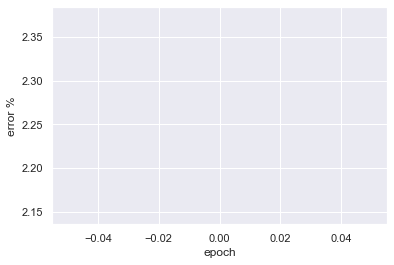

In [13]:
import seaborn as sns

sns.set()

plt.plot(list_epoch)
plt.ylabel("error %")
plt.xlabel("epoch")
plt.show()

In [14]:
lr = 0.005 # learning rate

list_epoch_woorst_case = []
for e in range(50):
    train_results = []
    test_results = []
    print("epoch:",e)
    for i in range(10):   
        
        model = Project2_tools.Sequential(Project2_tools.Linear(2,25,weight_bias),Project2_tools.Linear(25,25,weight_bias),Project2_tools.Linear(25,1,weight_bias), Project2_tools.Tanh())

        for j in range(e):
            if lr_reduction and j%10 == 0:
                lr = lr*0.85
            loss = []
            for b in range(int(train_input.size(0)/batch_size)):
                for i in range(0, batch_size):
                    output = model.forward(train_input[i+b*batch_size]) 
                    loss.append(mseLoss.forward(output, train_target[i+b*batch_size])) 
                    mseLoss_var = mseLoss.backward() 
                    model.backward(mseLoss_var) 

                model.Stock_Grad_Descent(lr) 
                model.zero_grad() 
            loss_mean = torch.mean(torch.tensor(loss)) 


        nb_errors_train = compute_error(train_input,train_target)
        nb_errors_test = compute_error(test_input,test_target)


        #print("Train Error : ",nb_errors_train/train_input.size(0)*100,"%")
        #print("Test Error : ",nb_errors_test/test_input.size(0)*100,"%")
        #print("")
        train_results.append(nb_errors_train/train_input.size(0)*100)
        test_results.append(nb_errors_test/test_input.size(0)*100)
    train_mean =  sum(train_results)/len(train_results)
    test_mean = sum(test_results)/len(test_results)
    print("Train Error : ",train_mean,"%")
    print("Test Error : ",test_mean,"%")
    print("")
    list_epoch_woorst_case.append(train_mean)

epoch: 0
Train Error :  48.949999999999996 %
Test Error :  49.25000000000001 %

epoch: 1
Train Error :  57.36 %
Test Error :  58.029999999999994 %

epoch: 2
Train Error :  59.539999999999985 %
Test Error :  59.629999999999995 %

epoch: 3
Train Error :  60.96999999999999 %
Test Error :  61.419999999999995 %

epoch: 4
Train Error :  59.519999999999996 %
Test Error :  60.06 %

epoch: 5
Train Error :  56.339999999999996 %
Test Error :  57.45 %

epoch: 6
Train Error :  54.86 %
Test Error :  55.8 %

epoch: 7
Train Error :  50.33 %
Test Error :  50.63000000000001 %

epoch: 8
Train Error :  50.91000000000001 %
Test Error :  51.27 %

epoch: 9
Train Error :  50.300000000000004 %
Test Error :  50.60000000000001 %

epoch: 10
Train Error :  50.300000000000004 %
Test Error :  50.60000000000001 %

epoch: 11
Train Error :  50.300000000000004 %
Test Error :  50.60000000000001 %

epoch: 12
Train Error :  50.300000000000004 %
Test Error :  50.60000000000001 %

epoch: 13
Train Error :  50.300000000000004 

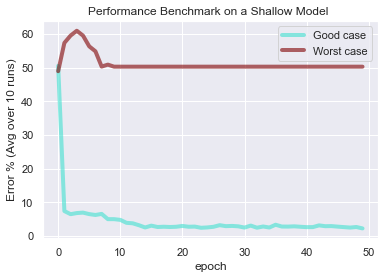

In [23]:


plt.title("Performance Benchmark on a Shallow Model ")
plt.plot(list_epoch,  alpha=0.6, linewidth=4, color='turquoise', label='Good case')
plt.plot(list_epoch_woorst_case, alpha=0.6, linewidth=4, color='maroon', label='Worst case')
plt.ylabel("Error % (Avg over 10 runs)")
plt.xlabel("epoch")
plt.legend(loc='upper right')
plt.show()